In [3]:
import wandb
import matplotlib.pyplot as plt

from seisLM.utils import project_path
from seisLM.utils import plot_utils


wandb.login()
api = wandb.Api()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: tliu. Use `wandb login --relogin` to force relogin


In [15]:
MAX_SAMPLES = 100_000

def get_end_point_acc(run_paths):
  end_point_acc_dict = {}
  for name, path in run_paths.items():
    run = api.run(path)
    history = run.history(
      samples=MAX_SAMPLES,
      keys=['val/acc']
    )

    assert len(history) <= MAX_SAMPLES
    # end_point_acc_dict[name] = history['val/acc'].to_list()[-1]
    end_point_acc_dict[name] = max(history['val/acc'].to_list())
  return end_point_acc_dict

In [20]:
seisLM_large_run_paths = {
  # '0.05': "tliu/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_9_frac_0.05_2024-09-10-17h-35m-40s",
  '0.1': "tliu/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_9_frac_0.1_2024-09-10-17h-35m-40s",
  '0.2': "tliu/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_9_frac_0.2_2024-09-10-17h-35m-40s",
  '0.5': "tliu/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_9_frac_0.5_2024-09-10-17h-34m-47s",
  '1.0': "tliu/foreshock_aftershock_run/seisLM_large_shock_classifier_nc_9_frac_1.0_2024-09-10-17h-34m-47s",
}


seisLM_base_run_paths = {
  # '0.05': "tliu/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_9_frac_0.05_2024-09-10-17h-34m-39s",
  '0.1': "tliu/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_9_frac_0.1_2024-09-10-17h-34m-42s",
  '0.2': "tliu/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_9_frac_0.2_2024-09-10-17h-34m-42s",
  '0.5': "tliu/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_9_frac_0.5_2024-09-10-17h-34m-42s",
  '1.0': "tliu/foreshock_aftershock_run/seisLM_base_shock_classifier_nc_9_frac_1.0_2024-09-10-17h-35m-37s",
}

convnet_run_paths = {
  # '0.05': "tliu/foreshock_aftershock_run/num_classes_9_seed_42_training_fraction_0.05_model_Conv1DShockClassifier_time_2024-09-10-13h-46m-48s",
  '0.1': "tliu/foreshock_aftershock_run/num_classes_9_seed_42_training_fraction_0.1_model_Conv1DShockClassifier_time_2024-09-10-13h-46m-48s",
  '0.2': "tliu/foreshock_aftershock_run/num_classes_9_seed_42_training_fraction_0.2_model_Conv1DShockClassifier_time_2024-09-10-13h-46m-47s",
  '0.5': "tliu/foreshock_aftershock_run/num_classes_9_seed_42_training_fraction_0.5_model_Conv1DShockClassifier_time_2024-09-10-13h-46m-47s",
  '1.0': "tliu/foreshock_aftershock_run/num_classes_9_seed_42_training_fraction_1.0_model_Conv1DShockClassifier_time_2024-09-10-13h-46m-57s",
}

In [21]:

shock_classification_results = {
  'SeisLM_base': get_end_point_acc(seisLM_base_run_paths),
  'SeisLM_large': get_end_point_acc(seisLM_large_run_paths),
  'ConvNet': get_end_point_acc(convnet_run_paths)
}

shock_classification_results

{'SeisLM_base': {'0.1': 0.4799247086048126,
  '0.2': 0.5332496762275696,
  '0.5': 0.6141781806945801,
  '1.0': 0.6568381190299988},
 'SeisLM_large': {'0.1': 0.4573400318622589,
  '0.2': 0.557716429233551,
  '0.5': 0.6919698715209961,
  '1.0': 0.7503136992454529},
 'ConvNet': {'0.1': 0.39711418747901917,
  '0.2': 0.4542032480239868,
  '0.5': 0.5872020125389099,
  '1.0': 0.7371392846107483}}

In [22]:
kwargs = {
  'SeisLM_base': {'color': '#74c476', 'marker': '^', 'ls': '--', 'markevery': 1},
  'SeisLM_large': {'color': '#006d2c', 'marker': 's', 'markevery': 1},
  'ConvNet': {'color': '#08519c', 'marker': 'o', 'ls': '--', 'markevery': 1}
}

(1.0, 0.05)

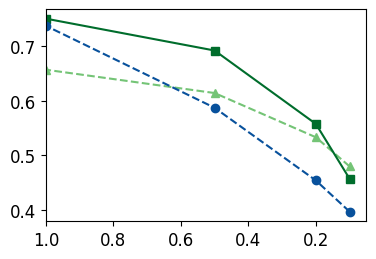

In [23]:
a4_width = 8.27
fig_width = a4_width / 2
fig_height = fig_width / 1.5
marker_size = 20

FONT_SIZE = 12
# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 1, figsize=(fig_width, fig_height))
plt.rcParams.update({
    'font.size': FONT_SIZE,  # General font size
    'axes.titlesize': FONT_SIZE,  # Subplot titles
    'figure.titlesize': FONT_SIZE,  # Suptitle (main title)
    'legend.fontsize': FONT_SIZE,  # Legend font size
    'pdf.fonttype': 42,  # Embed fonts in PDF for better compatibility
})


# for key, val in history_dict.items():
for key, val in shock_classification_results.items():
  acc_list = list(val.values())
  frac_list = [float(a) for a in list(val.keys())]
  axes.plot(frac_list, acc_list, label=key.replace('_', ' '), **kwargs[key])

axes.set_xlim(1.0, 0.05)



In [26]:
frac_list[::-1]

[1.0, 0.5, 0.2, 0.1, 0.05]